In [210]:
from sklearn.metrics import silhouette_score
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 200)
from sklearn.impute import SimpleImputer

In [211]:
from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import pairwise_distances, cosine_similarity, cosine_distances
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [212]:
#reading in my data frame and replacing spaces and unwanted marks in the columns
#/Users/airtonkamdem/GA_DSI/submit/projects/capstone/data/recommended_tableau.csv
cluster = pd.read_csv('./data/county_kmeans_not_encoded.csv')
recommended = pd.read_csv('./data/use_for_recommender1.csv')
cluster.drop(columns=['Unnamed: 0'], inplace=True)


<AxesSubplot:>

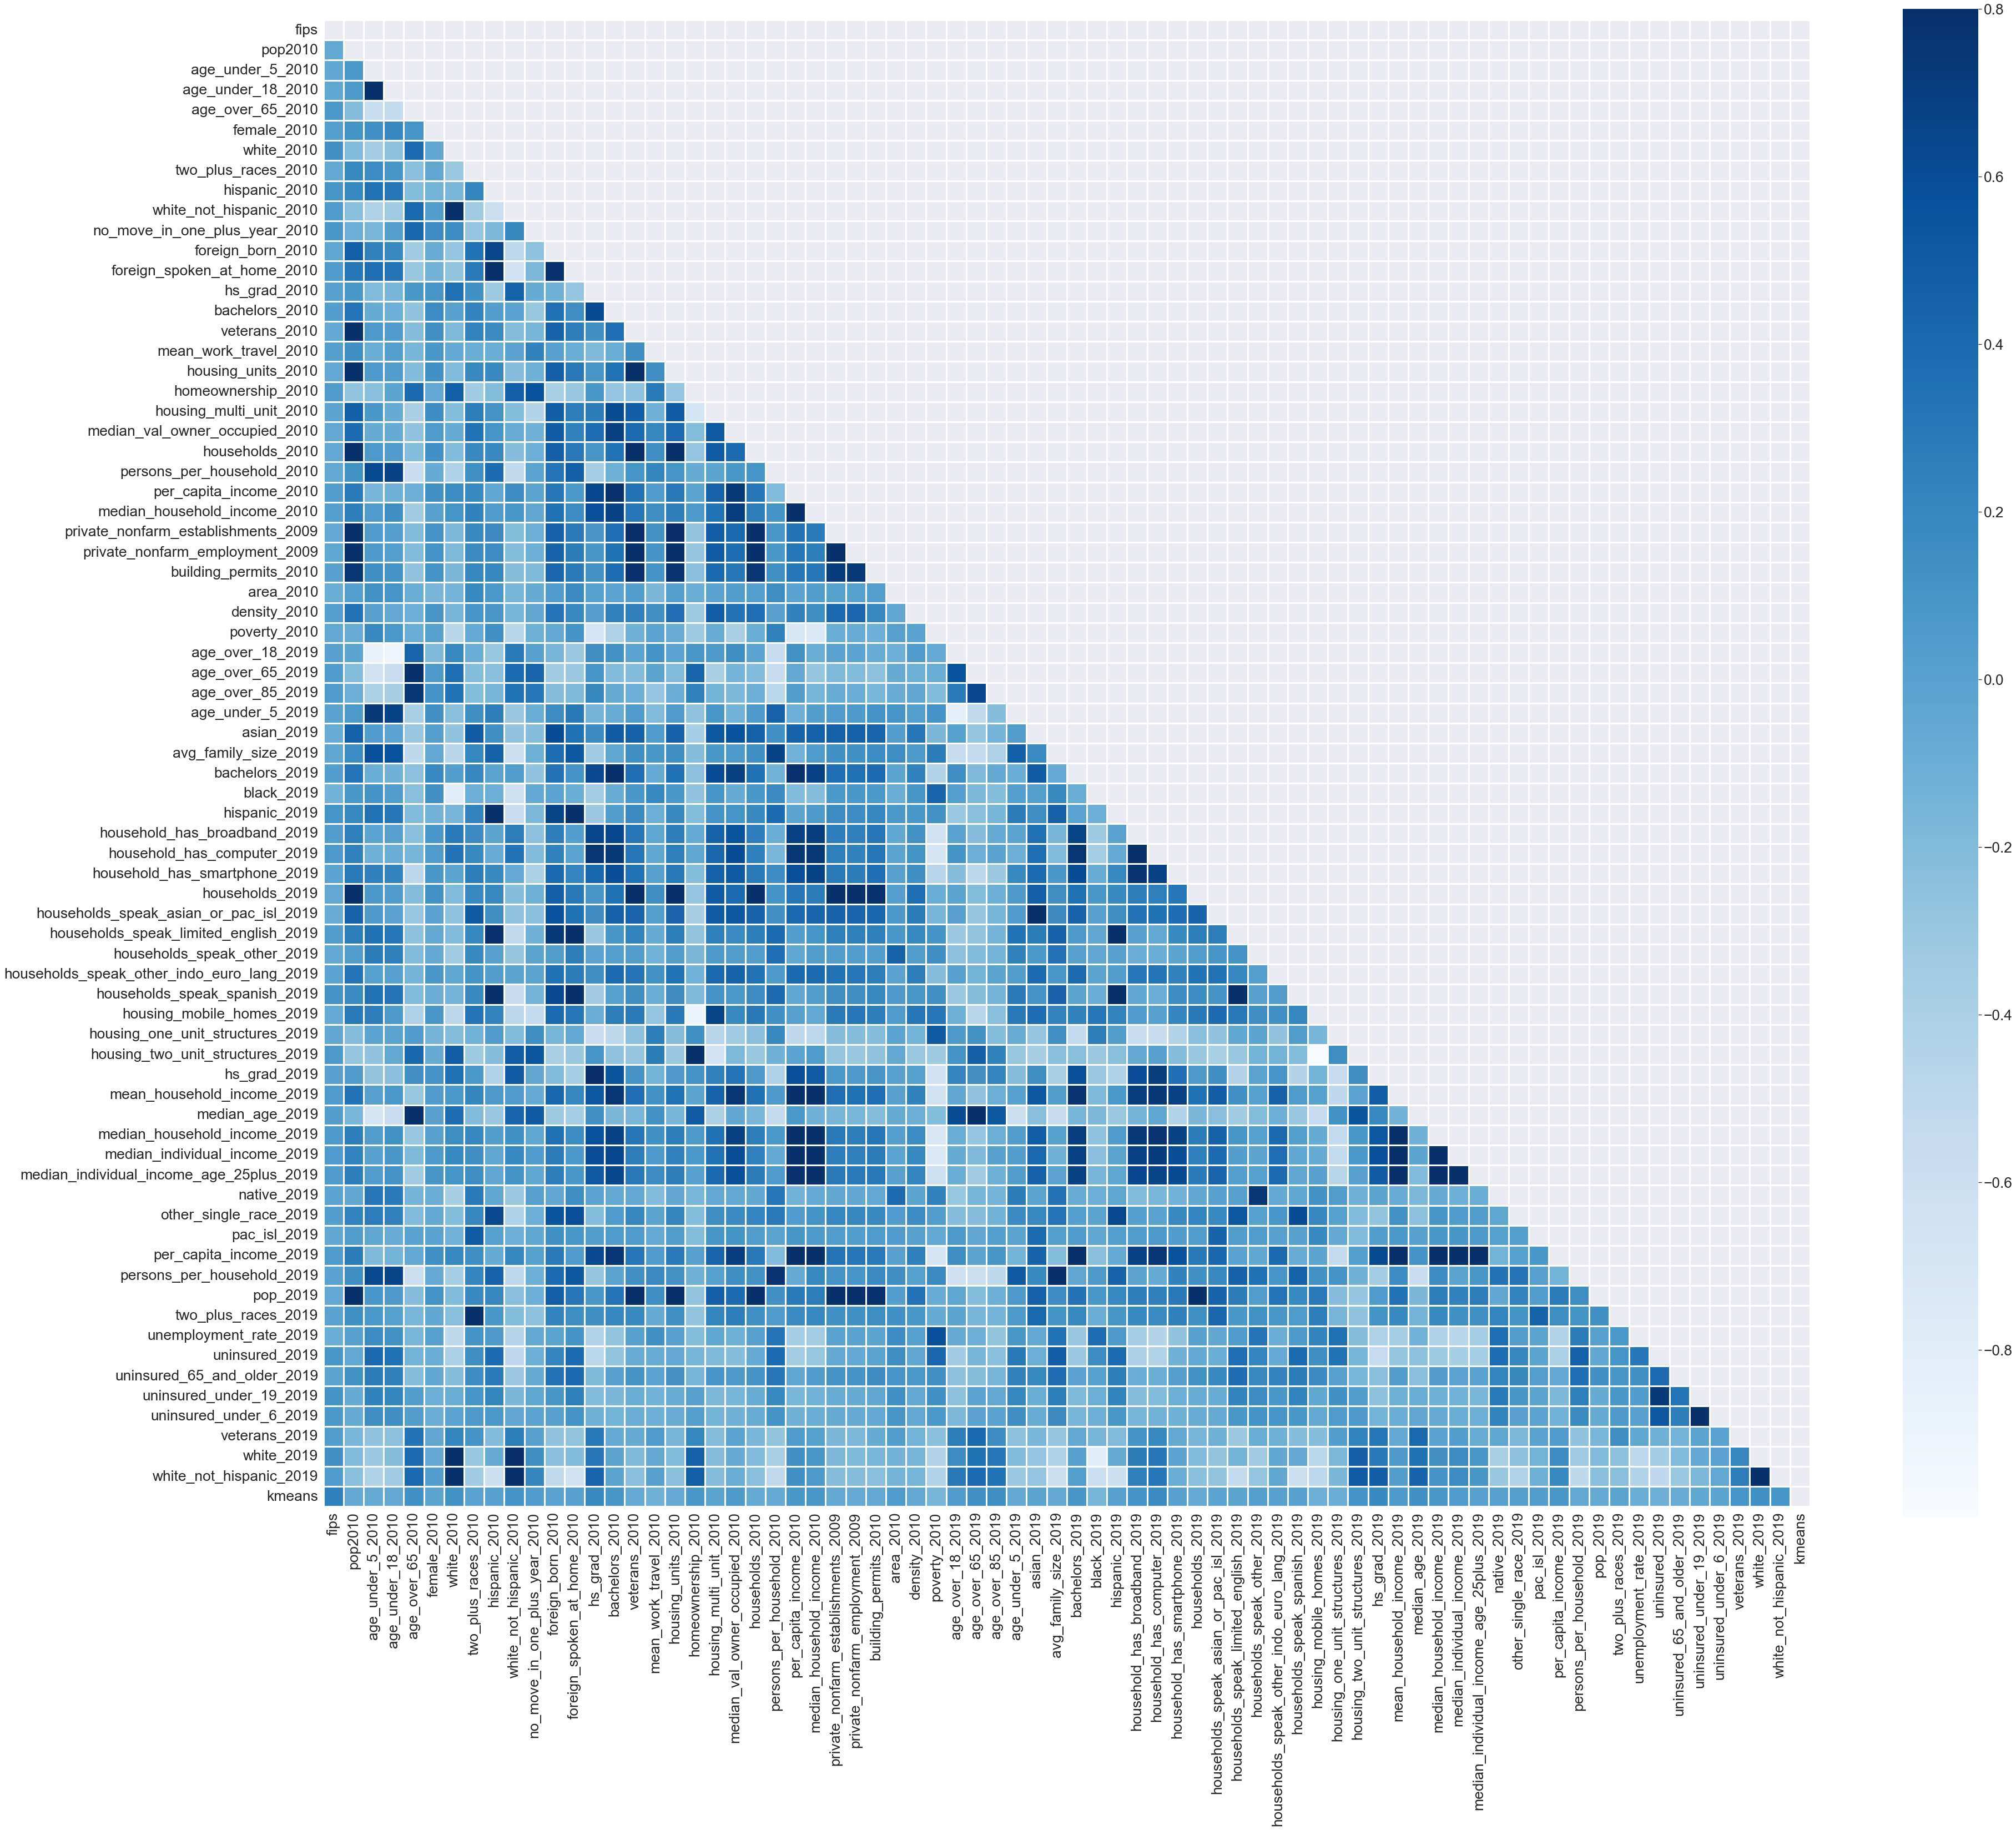

In [213]:
#Bulding a wholistic correlation matrix
cormat = cluster.corr() 
mask = np.triu(np.ones_like(cormat, dtype=bool))
sns.set(font_scale=2.4)

f, ax = plt.subplots(figsize=(60, 50))

sns.heatmap(cormat, vmax=.8, square=True, mask=mask,
            annot=False, cmap='Blues', linewidths=3)


<AxesSubplot:>

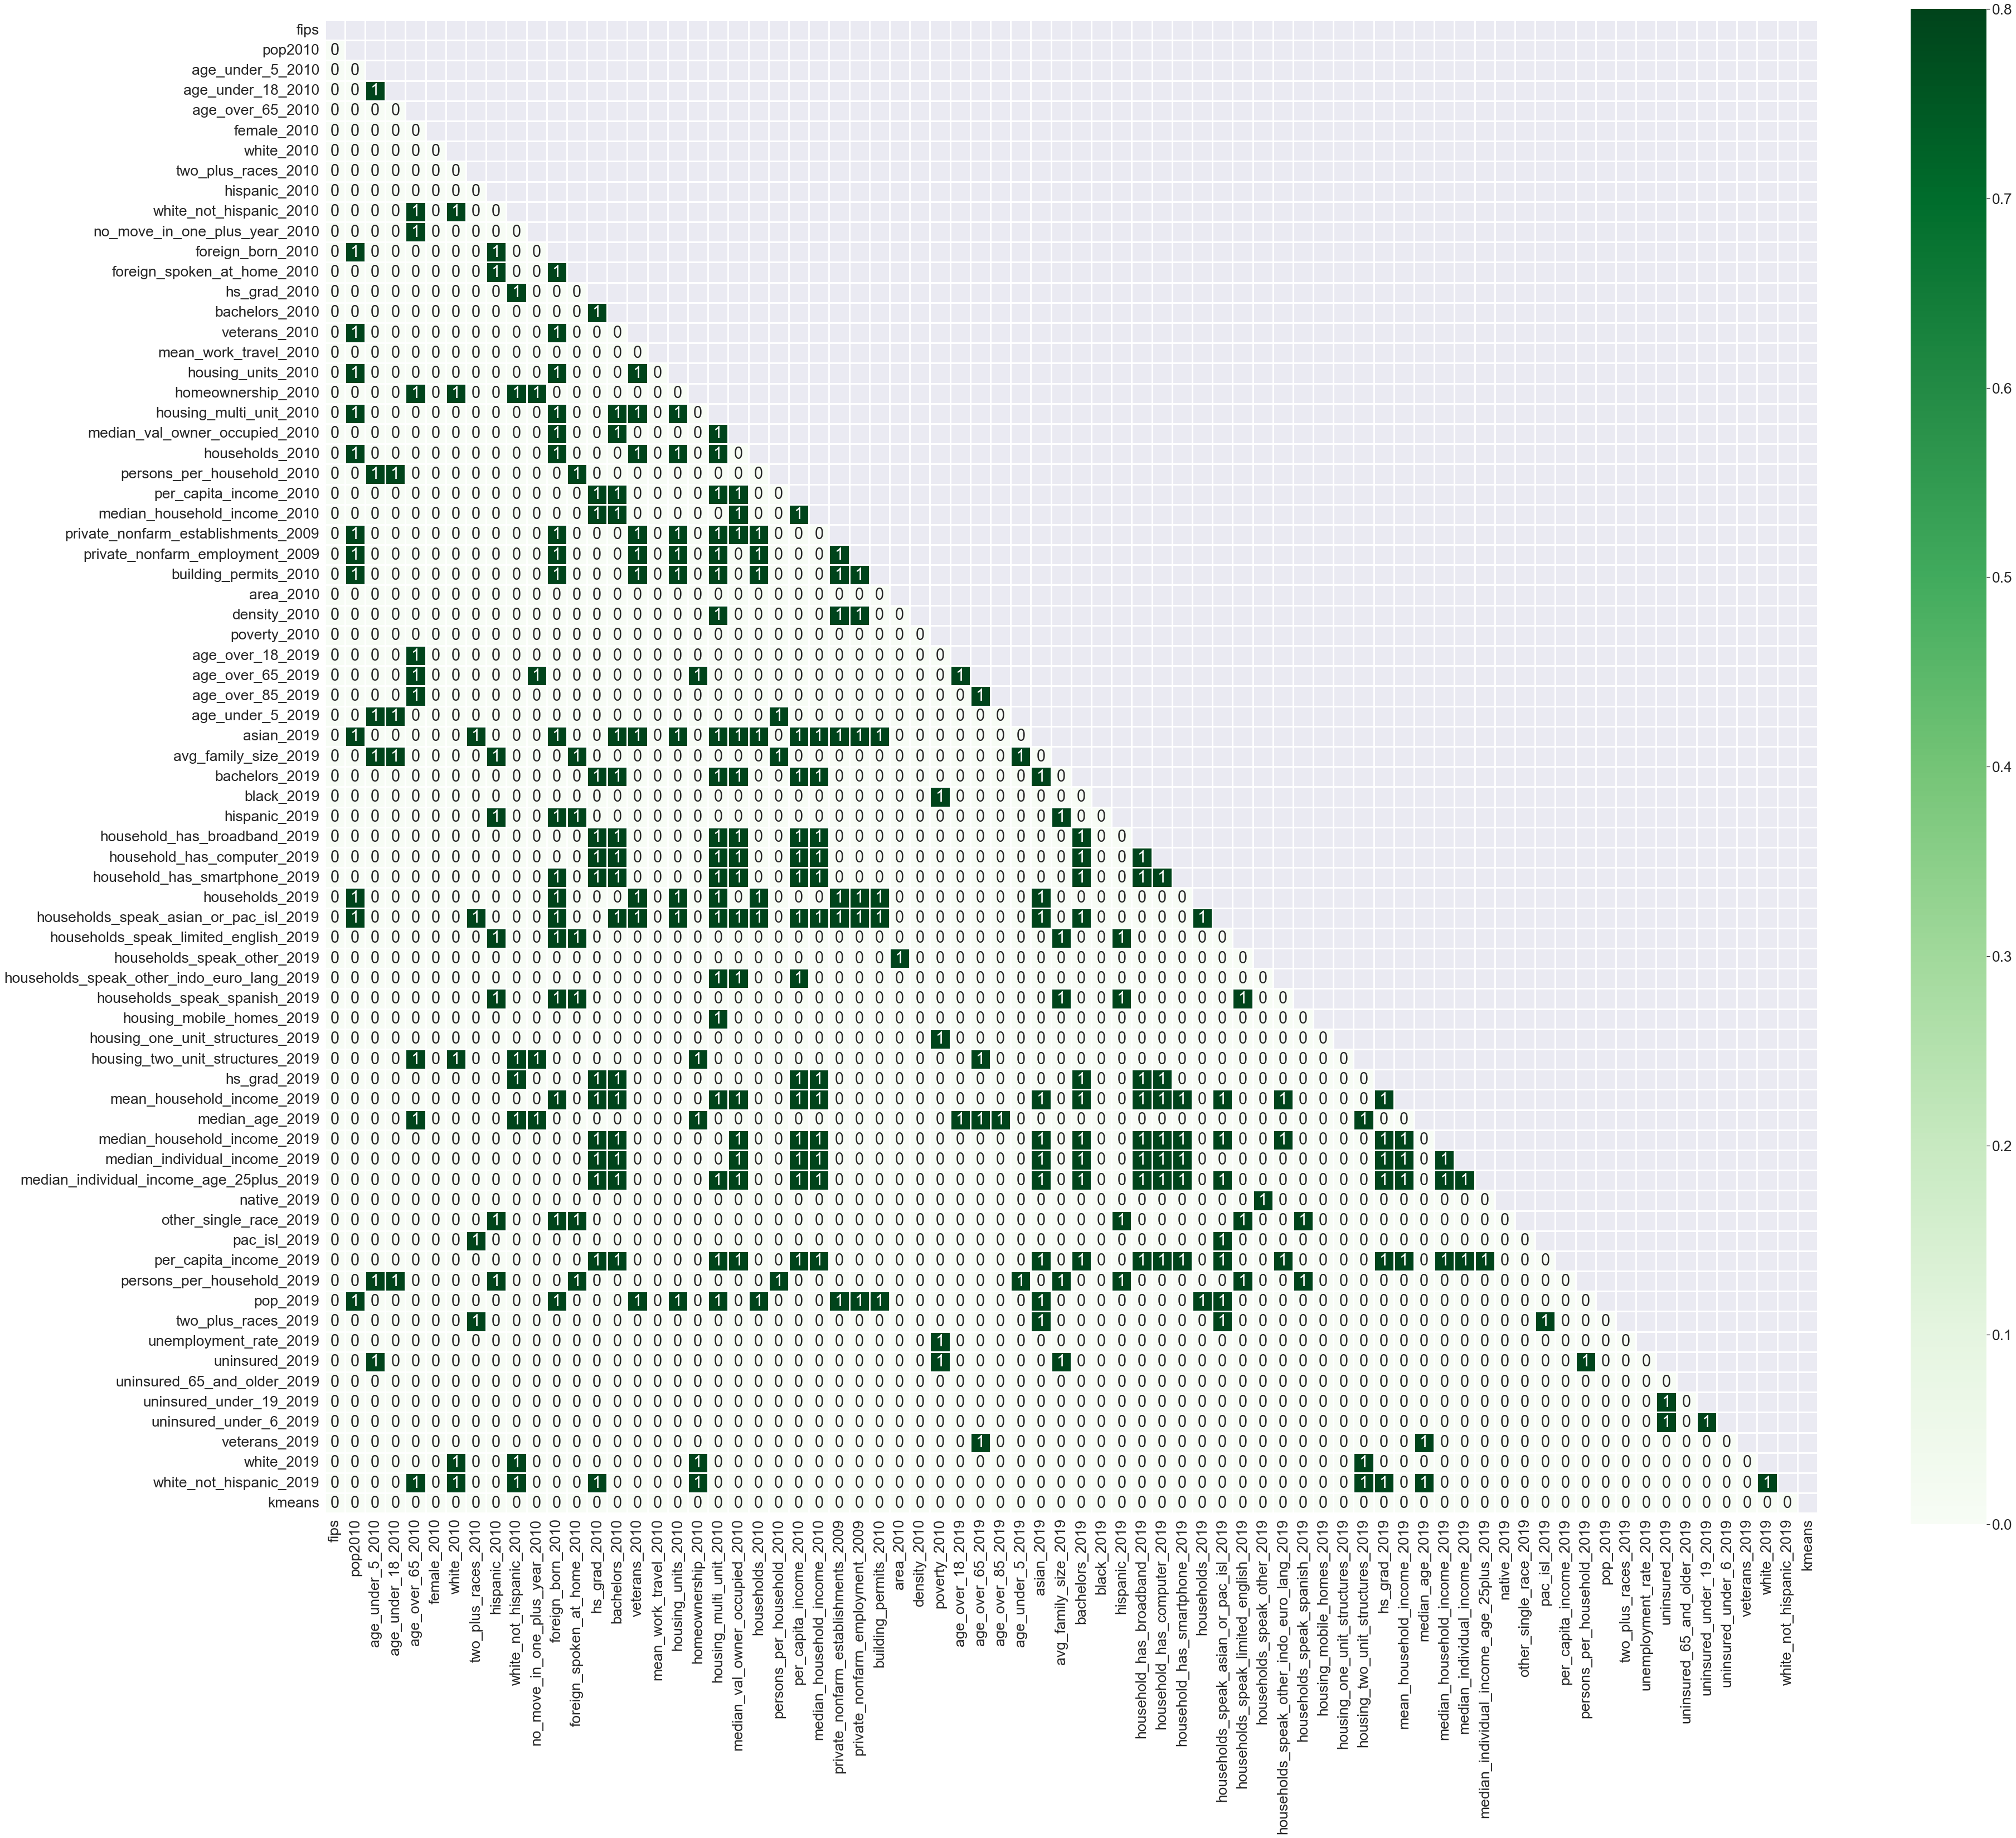

In [214]:
#correlatio matrix with only values above or equal to .4 
cormat = cluster.corr() >= .4
mask = np.triu(np.ones_like(cormat, dtype=bool))
sns.set(font_scale=2.4)

f, ax = plt.subplots(figsize=(60, 50))

sns.heatmap(cormat, vmax=.8, square=True, mask=mask,
            annot=True, cmap='Greens', linewidths=3)


<AxesSubplot:>

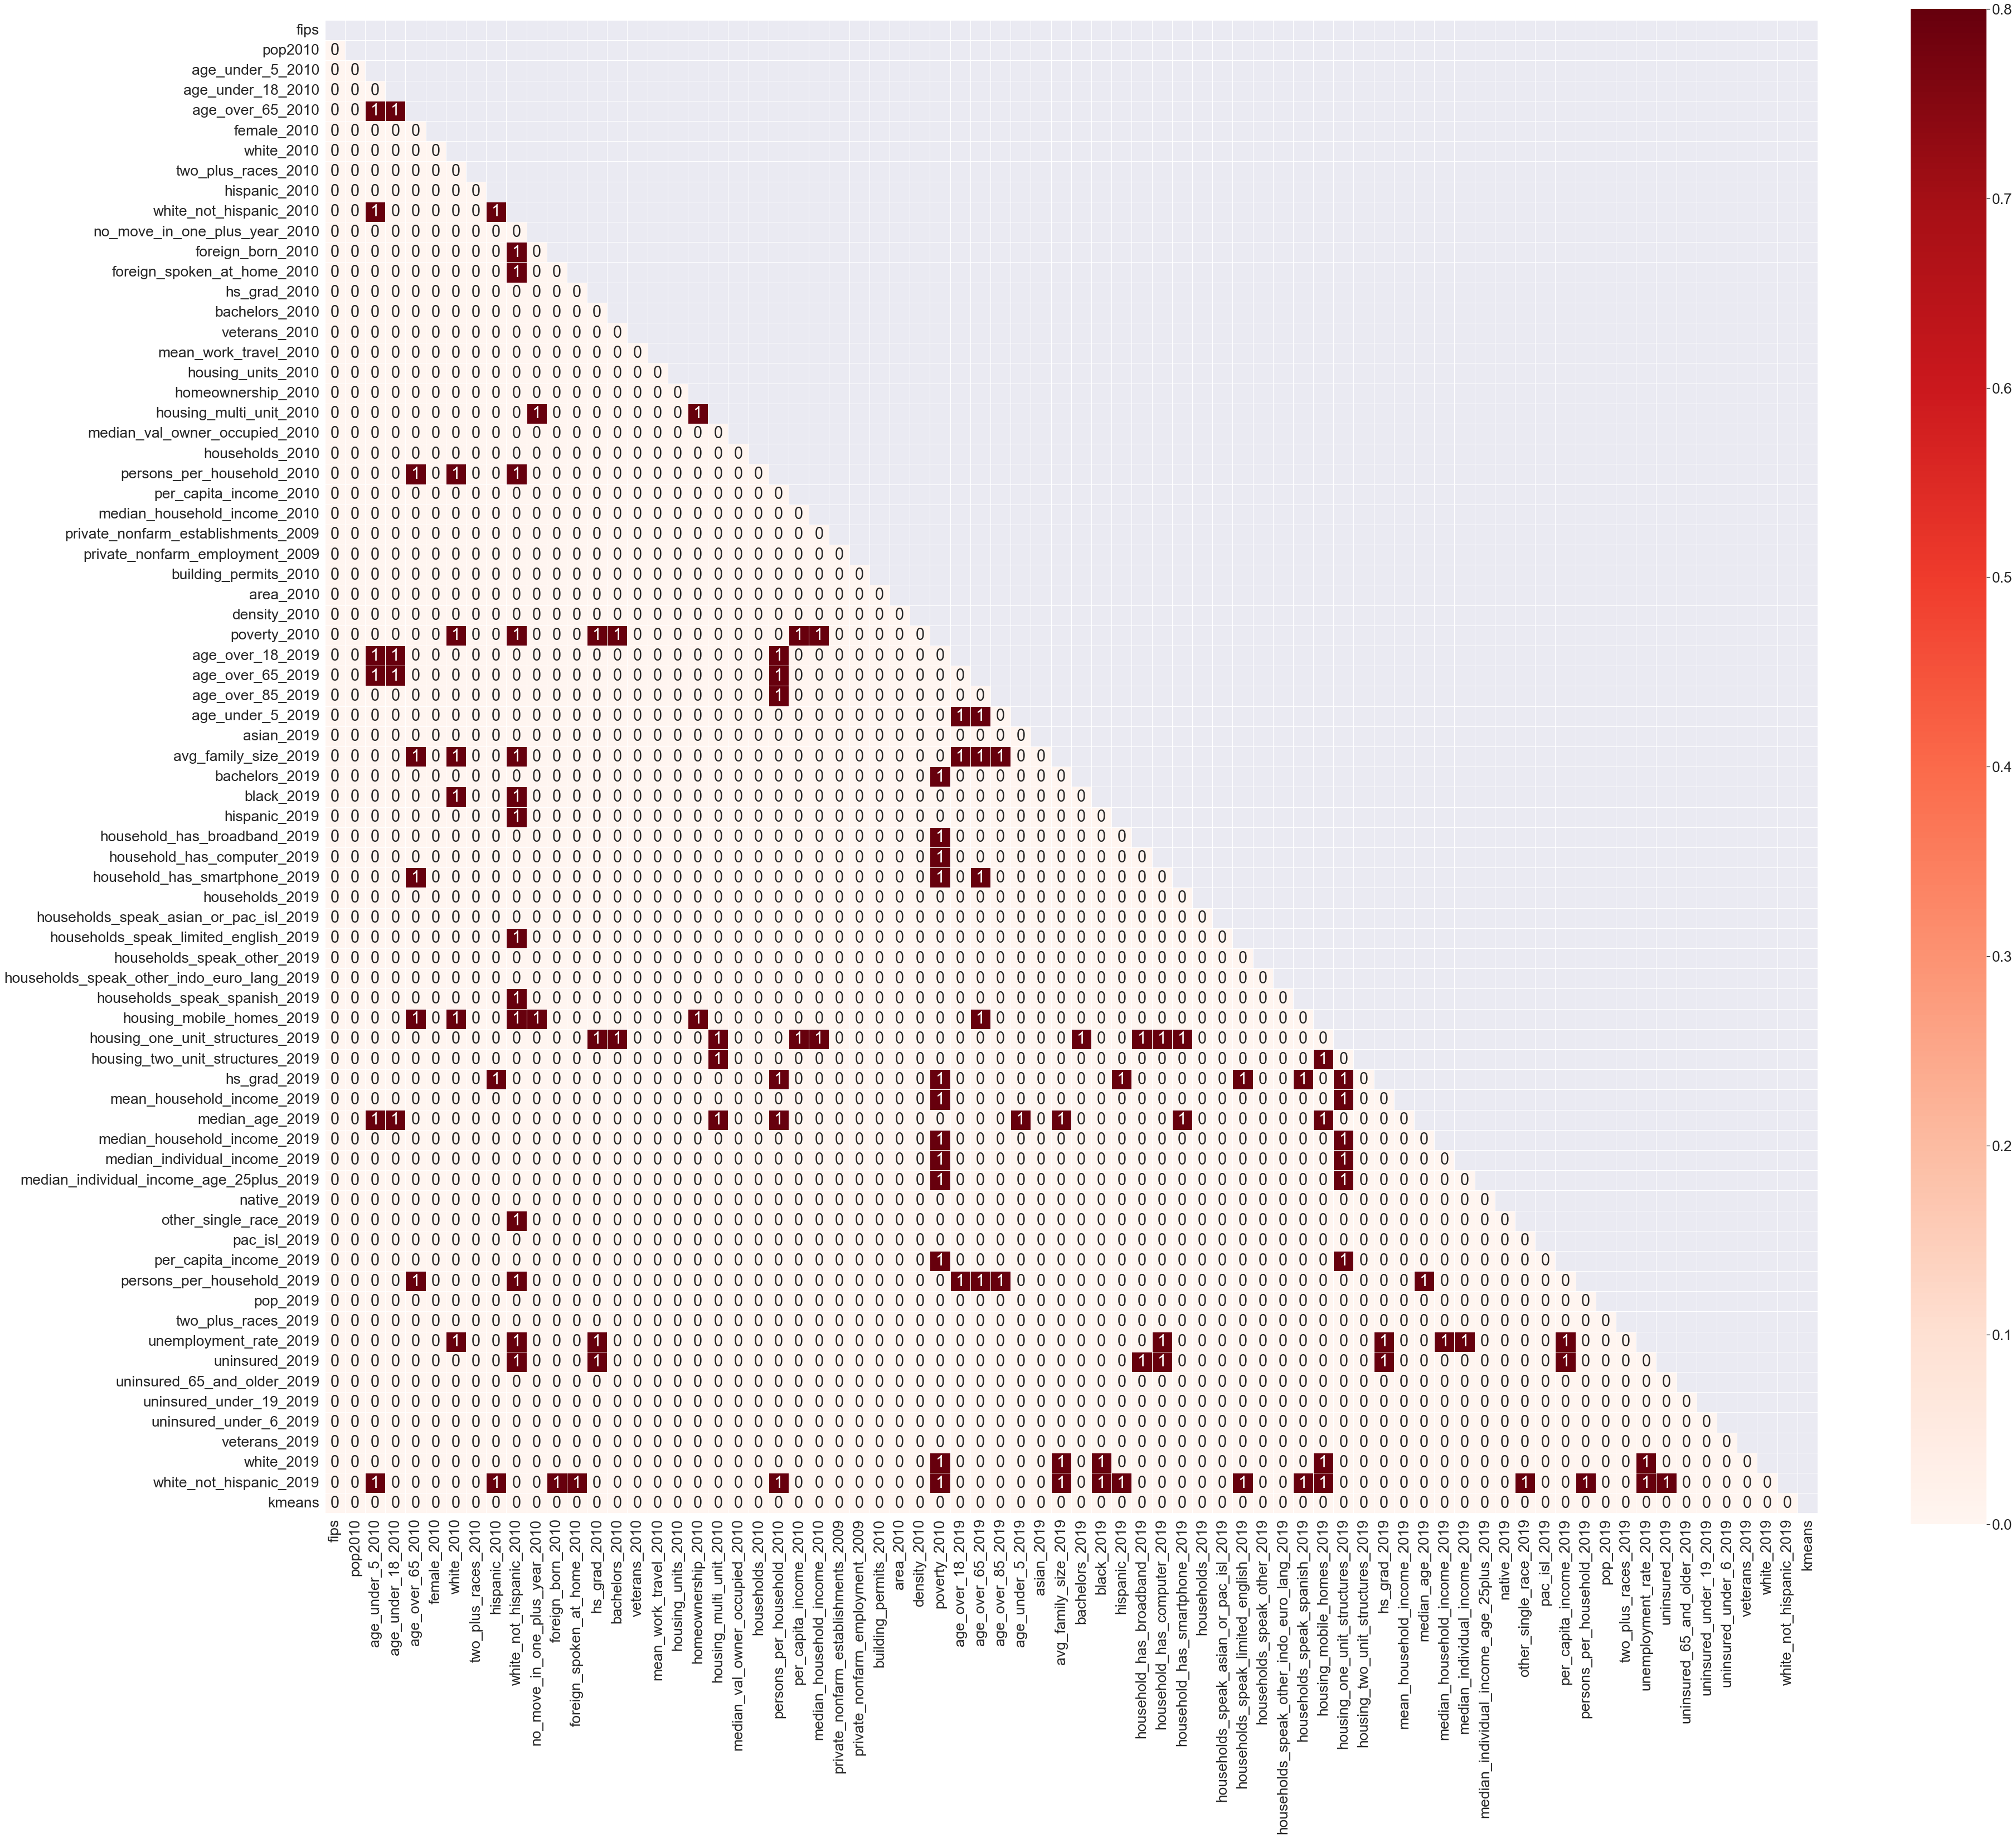

In [215]:
#correlation matrix with only values at or below -.4
cormat = cluster.corr() <= -.4
mask = np.triu(np.ones_like(cormat, dtype=bool))
sns.set(font_scale=2.4)
f, ax = plt.subplots(figsize=(60, 50))

sns.heatmap(cormat, vmax=.8, square=True, mask=mask,
            annot=True, cmap='Reds', linewidths=.5)


In [216]:
#cleating a new column explicitly stating the cluster number
cluster['cluster'] = cluster.kmeans.apply(lambda x: 'cluster number ' + str(x))
cluster['cluster'] = cluster['cluster'].astype(str)

<AxesSubplot:>

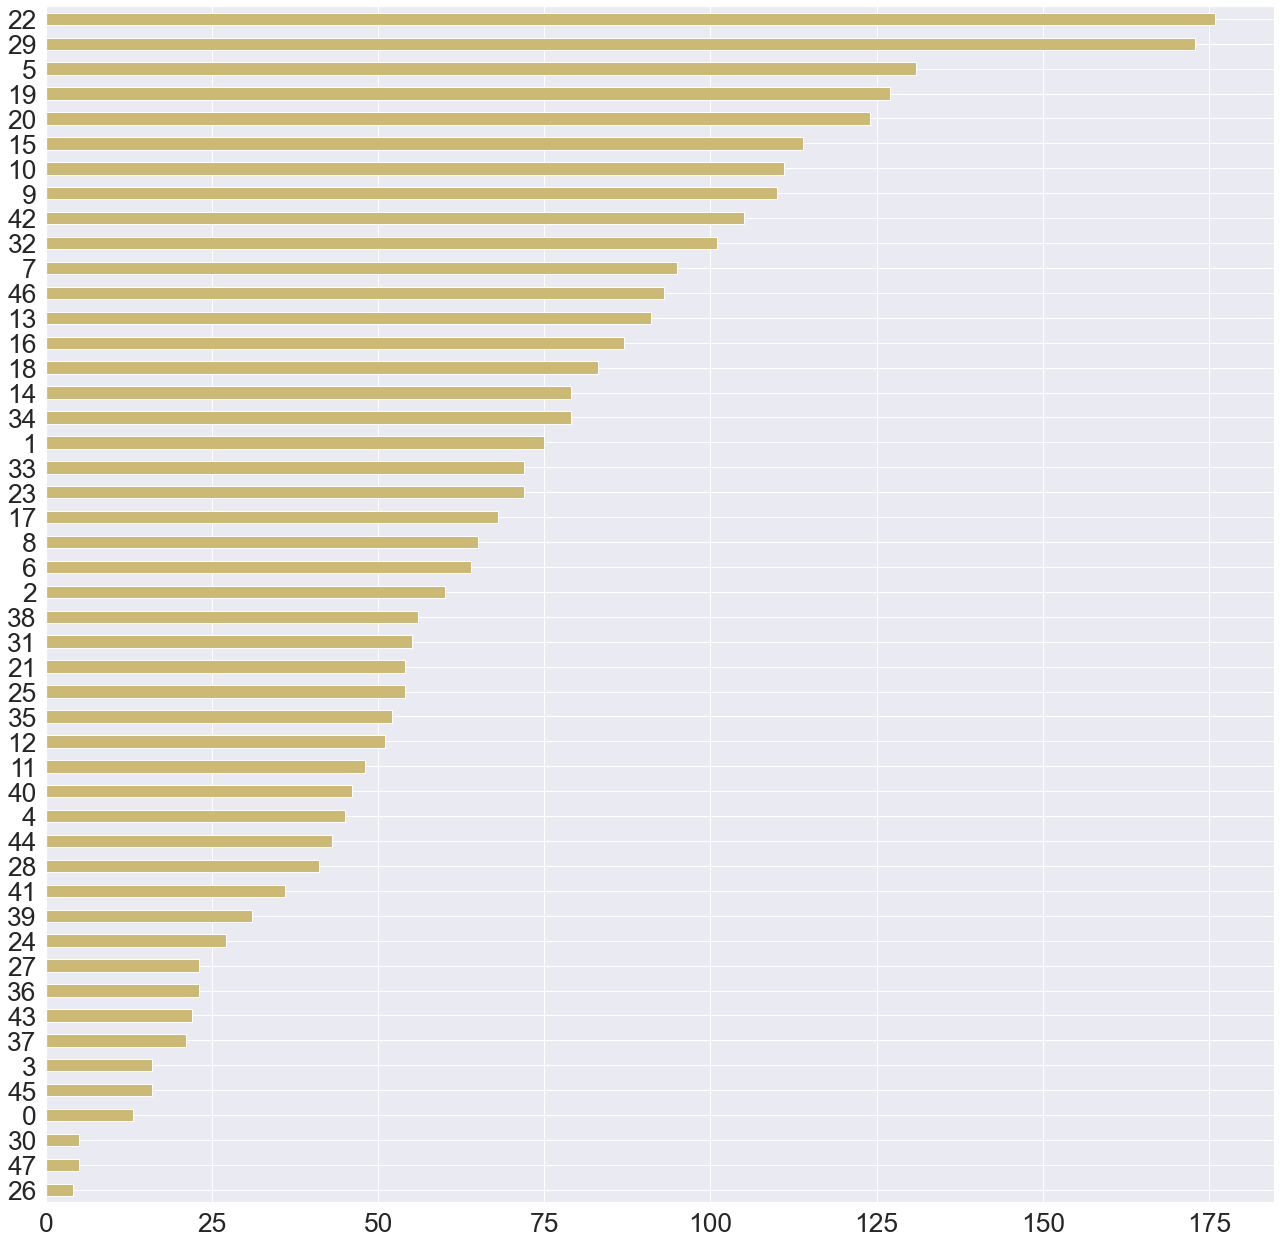

In [217]:
#visualising the sizes of clusters 
dfout = cluster['kmeans'].value_counts().sort_values()
dfout.plot(kind='barh', figsize=(22, 22), color='y')

In [218]:
#confirming the exact number of counties per cluster in the largest cluster
cluster['kmeans'].value_counts().head(3)

22    176
29    173
5     131
Name: kmeans, dtype: int64

In [219]:
cluster.groupby('kmeans')['pop2010'].mean().sort_values(ascending=False).head(3)

kmeans
26    5.730714e+06
4     1.452128e+06
37    4.186616e+05
Name: pop2010, dtype: float64

In [220]:
#average unemployment rate by cluster
cluster.groupby('kmeans')['unemployment_rate_2019'].mean().sort_values().plot(kind='barh', figsize=(22, 22))
#Alaska (Bethel, Dilligham, Ksilvak) - highest unemployment rate
# North Dakota (Adams, Barnes, Billings) - Lowest UE rate

<AxesSubplot:ylabel='kmeans'>

<AxesSubplot:ylabel='kmeans'>

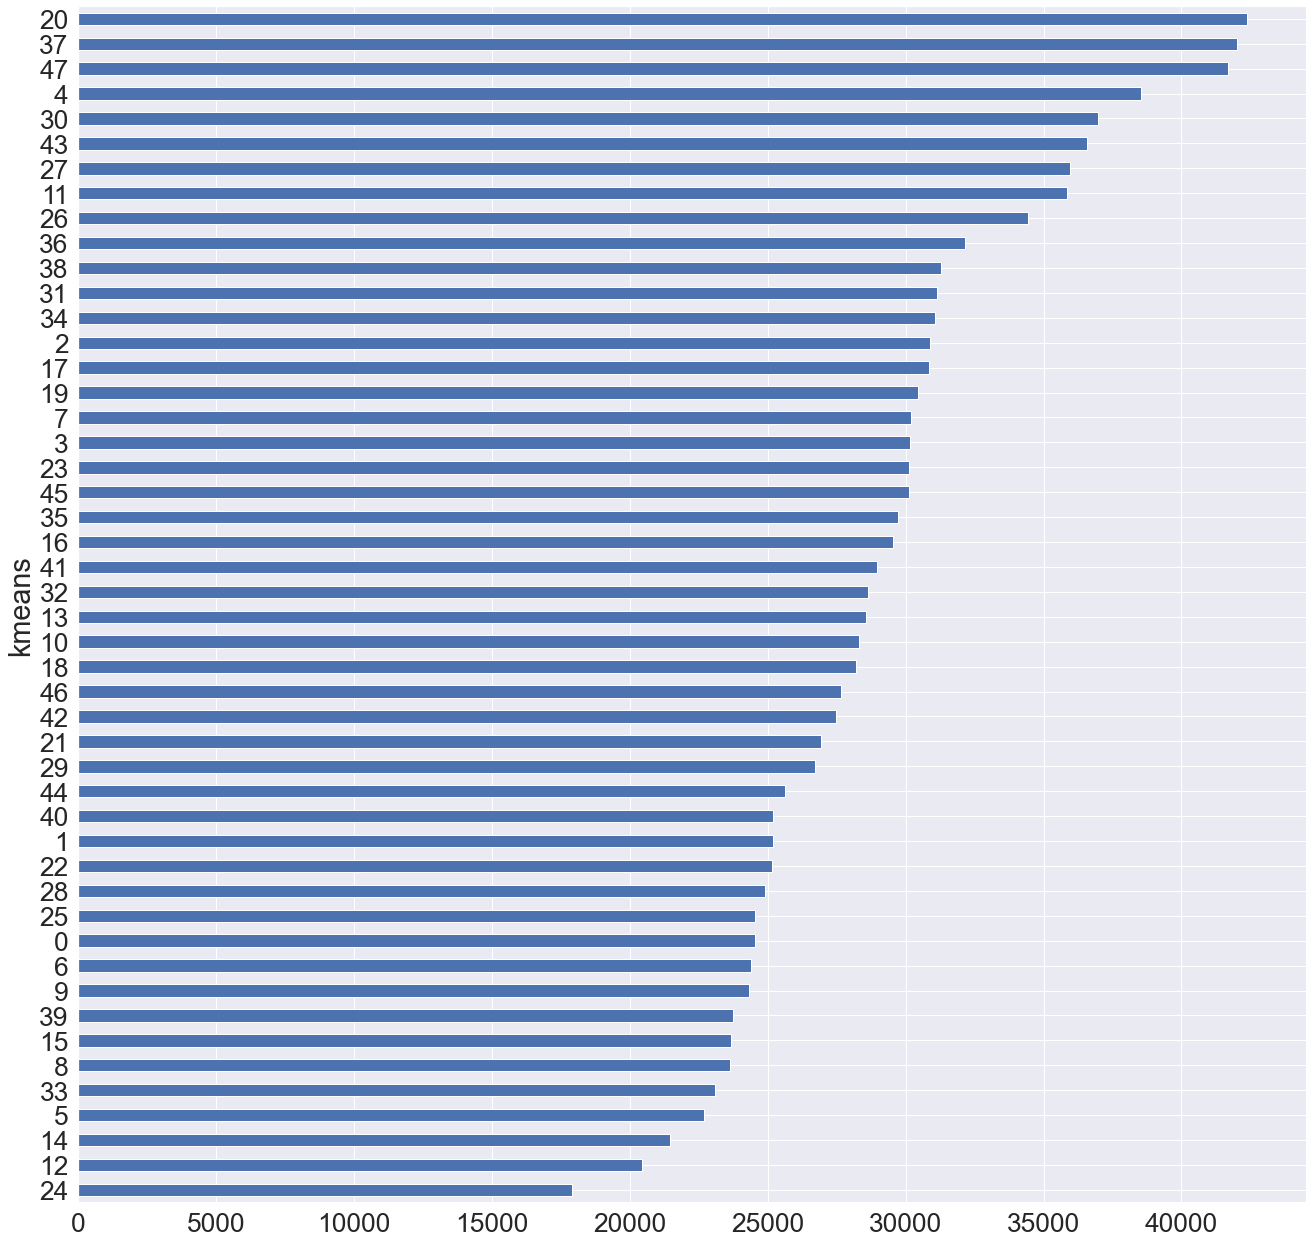

In [221]:
#average per capita imcome per cluster
cluster[cluster['kmeans'] == 11].head(3)
cluster.groupby('kmeans')['per_capita_income_2019'].mean().sort_values().plot(kind='barh', figsize=(22, 22))

In [222]:
#sreviewing the CLUSTER with the lowest per capita income
cluster[cluster['kmeans'] == 24].head(5)

fips   state                        name  pop2010  age_under_5_2010  \
70  2050  Alaska          Bethel Census Area    17013              10.6   
73  2070  Alaska      Dillingham Census Area     4847               9.3   
81  2158  Alaska        Kusilvak Census Area     7459              12.1   
82  2164  Alaska  Lake and Peninsula Borough     1631               8.5   
84  2180  Alaska            Nome Census Area     9492              10.7   

    age_under_18_2010  age_over_65_2010  female_2010  white_2010  \
70               36.5               6.1         47.7        11.1   
73               32.9               7.6         47.6        18.1   
81               41.6               5.4         47.1         2.7   
82               30.2               7.8         47.3        23.3   
84               34.3               6.4         46.7        16.4   

    two_plus_races_2010  hispanic_2010  white_not_hispanic_2010  \
70                  4.2            1.1                     10.9   
73                  9.0            2.1                     17.6   
81                  2.0            0.1                      2.7   
82                 10.1            2.6                     22.2   
84                  6.2            1.2                     15.9   

    no_move_in_one_plus_year_2010  foreign_born_2010  \
70                           81.9                0.6   
73                           85.1                1.5   
81                           86.5                0.1   
82                           86.9                1.8   
84                           81.7                1.1   

    foreign_spoken_at_home_2010  hs_grad_2010  bachelors_2010  veterans_2010  \
70                         68.7          78.4            13.9            770   
73                         35.1          82.6            20.2            206   
81                         58.1          73.6             7.7            322   
82                         14.7          78.0            13.5             77   
84                         27.9          83.8            14.9            693   

    mean_work_travel_2010  housing_units_2010  homeownership_2010  \
70                    7.0                5919                61.3   
73                    9.2                2427                60.7   
81                    5.4                2183                64.8   
82                    6.3                1502                75.0   
84                    5.9                4008                56.2   

    housing_multi_unit_2010  median_val_owner_occupied_2010  households_2010  \
70                     13.9                          153400             4291   
73                     14.1                          199100             1408   
81                      4.1                           80300             1728   
82                      2.5                          156400              492   
84                     17.4                          144600             2693   

    persons_per_household_2010  per_capita_income_2010  \
70                        3.88                   18584   
73                        3.42                   22597   
81                        4.28                   11269   
82                        3.30                   15161   
84                        3.31                   20549   

    median_household_income_2010  private_nonfarm_establishments_2009  \
70                         52214                                  202   
73                         60800                                  101   
81                         37955                                   55   
82                         40909                                   48   
84                         53899                                  155   

    private_nonfarm_employment_2009  building_permits_2010  area_2010  \
70                             3471                     10   40570.00   
73                             1256                      0   18568.78   
81                  

In [223]:
#population and per capita income per cluster
fig = px.bar(cluster, x='kmeans', y='pop_2019', barmode='group', 
             hover_data=['bachelors_2019'], color='per_capita_income_2019', labels={'per_capita_income_2019': 'Per Capita Income'},
              height=400)
#labels={'pop_2019': 'population of cluster'},

fig.update_layout(
    title="Population and per capita income per cluster",
    yaxis_title="Population",
    xaxis_title="Cluster Numbers",
    legend_title="Per Capita Income",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    )
)
#fig.update_layout(xaxis={'categoryorder': 'total ascending'})
fig.update_traces(dict(marker_line_width=0))
fig.show()

In [224]:
#confiming the most populated counties in general
cluster.sort_values(by='pop_2019', ascending=False).head(3)

fips       state                name  pop2010  age_under_5_2010  \
204    6037  California  Los Angeles County  9818605               6.6   
610   17031    Illinois         Cook County  5194675               6.6   
2623  48201       Texas       Harris County  4092459               8.2   

      age_under_18_2010  age_over_65_2010  female_2010  white_2010  \
204                24.5              10.9         50.7        50.3   
610                23.7              11.9         51.6        55.4   
2623               28.0               8.1         50.2        56.6   

      two_plus_races_2010  hispanic_2010  white_not_hispanic_2010  \
204                   4.5           47.7                     27.8   
610                   2.5           24.0                     43.9   
2623                  3.2           40.8                     33.0   

      no_move_in_one_plus_year_2010  foreign_born_2010  \
204                            86.8               35.6   
610                            85.8               21.0   
2623                           81.0               25.0   

      foreign_spoken_at_home_2010  hs_grad_2010  bachelors_2010  \
204                          56.4          75.9            29.0   
610                          33.7          83.2            33.2   
2623                         41.7          77.6            27.7   

      veterans_2010  mean_work_travel_2010  housing_units_2010  \
204          368128                   29.0             3445076   
610          244059                   31.8             2180359   
2623         190111                   27.5             1598698   

      homeownership_2010  housing_multi_unit_2010  \
204                 48.2                     41.8   
610                 60.4                     54.0   
2623                57.8                     36.0   

      median_val_owner_occupied_2010  households_2010  \
204                           508800          3217889   
610                           265800          1936481   
2623                          131700          1372163   

      persons_per_household_2010  per_capita_income_2010  \
204                         2.97                   27344   
610                         2.63                   29335   
2623                        2.85                   26788   

      median_household_income_2010  private_nonfarm_establishments_2009  \
204                          55476                               245523   
610                          53942                               127868   
2623                         51444                                91082   

      private_nonfarm_employment_2009  building_permits_2010  area_2010  \
204                           3703233                   7260    4057.88   
610                           2245334                   2734     945.33   
2623                          1809432                  15039    1703.48   

      density_2010  poverty_2010  age_over_18_2019  age_over_65_2019  \
204         2419.6          15.7              78.0              13.3   
610         5495.1          15.3              78.0              14.3   
2623        2402.4          16.8              73.2              10.2   

      age_over_85_2019  age_under_5_2019  asian_2019  avg_family_size_2019  \
204                1.8               6.1        14.6                  3.66   
610                1.9               6.2         7.3                  3.39   
2623               1.0               7.6         7.0                  3.52   

      bachelors_2019  black_2019  hispanic_2019  household_has_broadband_2019  \
204             32.5         8.1           48.5                          84.3   
610             38.8        23.4           25.3                          81.4   
2623            31.5        19.0           42.9                          83.6   

      household_has_computer_2019  household_has_smartphone_2019  \
204                          80.3                           84.3   
610                          77.1    

In [225]:
#income and diversity index
df = px.data.tips()
fig = px.scatter(cluster, x="two_plus_races_2019",
                 y="median_individual_income_2019", trendline="ols", color='household_has_broadband_2019', labels={'household_has_broadband_2019': 'Percentage of homes with broadband'})
fig.update_layout(
    title="Median income and Diversity Index",
    yaxis_title="Median Income",
    xaxis_title="Diversity Index",
    legend_title="Per Capita Income",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    )
)  
fig.show()

In [226]:
#age and income
df = px.data.tips()
fig = px.scatter(cluster, x="median_age_2019",
                 y="median_individual_income_2019", trendline="ols", color='household_has_broadband_2019', labels={'household_has_broadband_2019': 'Percentage of homes with broadband'})

fig.update_layout(
    title="Age and Income",
    yaxis_title="Median Income",
    xaxis_title="Median age",
    legend_title="Per Capita Income",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    )
)
fig.show()


# SCRAP WORK

In [206]:
recommended.sort_values(by=['state', 'name'], ascending=[True, True], inplace=True)
recommended.replace('none', np.nan, inplace=True)
recommended = recommended.fillna(value=np.nan)
recommended.fillna(recommended.mean())
recommended.dropna(axis=1, how='any', inplace=True)
reco_names = recommended[['fips', 'name', 'state']]
encodedBig = pd.get_dummies(recommended, columns=['state'])
encodedBig = encodedBig.drop(columns=['name'])
ss = StandardScaler()
reco_scaled = ss.fit_transform(recommended.drop(columns=['name', 'state']))
#applying cosine similarities, distances, and pairwise distance
cs = cosine_similarity(reco_scaled)
recommended = pd.DataFrame(reco_scaled)
recommended = pd.concat([reco_names, recommended], axis=1, ignore_index=True)
recommended = recommended.rename(columns={0: 'fips', 1: 'name', 2: 'state'})
countyInput = 'Orange County'
stateInput = 'California'
state = recommended[recommended['state'] == stateInput]
countyIndex = state[recommended.name == countyInput].index.values[0]
scores = list(enumerate(cs[int(countyIndex)]))
sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
sorted_scores = sorted_scores[1:]


/var/folders/w3/8j3br3pn37q4dc1yqw7571580000gn/T/ipykernel_44971/3578470210.py:4: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

/var/folders/w3/8j3br3pn37q4dc1yqw7571580000gn/T/ipykernel_44971/3578470210.py:19: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [207]:
#setting a function to return the most similar counties
def similar(countyInput, stateInput):
    state = recommended[recommended['state'] == stateInput]
    countyIndex = state[recommended.name == countyInput].index.values[0]
    scores = list(enumerate(cs[int(countyIndex)]))
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
    sorted_scores = sorted_scores[1:]

    j = 0
    #print("Hmmm, it looks like you enjoy",
    #      countyInput, ',', stateInput, '-- you may also be fond of:\n')
    output = []
    for item in sorted_scores:
        itemIndex = item[0]
        sim_score = item[1]
        county_ = recommended.iloc[itemIndex][['name', 'state']].values[0]
        state_ = recommended.iloc[itemIndex][['name', 'state']].values[1]
        output.append(county_+', ' + state_)
        output.append(sim_score)
        #output = "Based on Cosine Similarities, the 5 most recommended counties to " + countyInput + ',' stateInput + 'is' listed[0]
        j = j+1
        if j > 10:
            break
    return output


similar(countyInput, stateInput)


/var/folders/w3/8j3br3pn37q4dc1yqw7571580000gn/T/ipykernel_44971/3935257003.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



['San Diego County, California',
 0.9555730646544692,
 'Sacramento County, California',
 0.920017269150254,
 'King County, Washington',
 0.9197195297481272,
 'Los Angeles County, California',
 0.91834822090212,
 'Cook County, Illinois',
 0.9079388506115198,
 'Clark County, Nevada',
 0.9020600530007808,
 'Hennepin County, Minnesota',
 0.8904334638490942,
 'Middlesex County, Massachusetts',
 0.88622497702891,
 'Dallas County, Texas',
 0.8841320314385736,
 'Orange County, Florida',
 0.8840655315875656,
 'Alameda County, California',
 0.883468908803048]

In [208]:

def similar_county(countyInput, stateInput):
    state = recommended[recommended['state'] == stateInput]
    countyIndex = state[recommended.name == countyInput].index.values[0]
    scores = list(enumerate(cs[int(countyIndex)]))
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
    sorted_scores = sorted_scores[1:]
    
    j = 0
    #print("Hmmm, it looks like you enjoy",
    #      countyInput, ',', stateInput, '-- you may also be fond of:\n')
    output = []
    for item in sorted_scores:
        itemIndex = item[0]
        sim_score = item[1]
        county_ = recommended.iloc[itemIndex][['name', 'state']].values[0]
        state_ = recommended.iloc[itemIndex][['name', 'state']].values[1]
        output.append(county_+', ' + state_)
        output.append(sim_score)
        #output = "Based on Cosine Similarities, the 5 most recommended counties to " + countyInput + ',' stateInput + 'is' listed[0]
        j = j+1
        if j > 5:
            break
    return output
    
    
similar_county(countyInput, stateInput)


/var/folders/w3/8j3br3pn37q4dc1yqw7571580000gn/T/ipykernel_44971/2247031629.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



['San Diego County, California',
 0.9555730646544692,
 'Sacramento County, California',
 0.920017269150254,
 'King County, Washington',
 0.9197195297481272,
 'Los Angeles County, California',
 0.91834822090212,
 'Cook County, Illinois',
 0.9079388506115198,
 'Clark County, Nevada',
 0.9020600530007808]

In [209]:
#previous formula for pickle#
#with open("county.pkl", "rb") as f:
#    classifier = pickle.load(f)


def similar_county(countyInput, stateInput):
    state = recommended[recommended['state'] == stateInput]
    countyIndex = state[recommended.name == countyInput].index.values[0]
    scores = list(enumerate(cs[int(countyIndex)]))
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
    sorted_scores = sorted_scores[1:]

    j = 0
    print("Based on Cosine Similarities, the 10 most recommended products to product",
          countyInput, ',', stateInput, 'are:\n')

    for item in sorted_scores:
        similar_d = item[0]
        distance = item[1]
        county_ = recommended.iloc[similar_d][['name', 'state']].values[0]
        state_ = recommended.iloc[similar_d][['name', 'state']].values[1]

        output = print(j+1, ')', county_, ',', state_,
                       'since it has a Cosine Similarity score of', round(distance, 3), 'out of 1')
        j = j+1
        if j > 10:
            break
            return output


model = similar_county(countyInput, stateInput)


#with open("county.pkl", "wb") as file:
 #   pickle.dump(model, file)


Based on Cosine Similarities, the 10 most recommended products to product Orange County , California are:

1 ) San Diego County , California since it has a Cosine Similarity score of 0.956 out of 1
2 ) Sacramento County , California since it has a Cosine Similarity score of 0.92 out of 1
3 ) King County , Washington since it has a Cosine Similarity score of 0.92 out of 1
4 ) Los Angeles County , California since it has a Cosine Similarity score of 0.918 out of 1
5 ) Cook County , Illinois since it has a Cosine Similarity score of 0.908 out of 1
6 ) Clark County , Nevada since it has a Cosine Similarity score of 0.902 out of 1
7 ) Hennepin County , Minnesota since it has a Cosine Similarity score of 0.89 out of 1
8 ) Middlesex County , Massachusetts since it has a Cosine Similarity score of 0.886 out of 1
9 ) Dallas County , Texas since it has a Cosine Similarity score of 0.884 out of 1
10 ) Orange County , Florida since it has a Cosine Similarity score of 0.884 out of 1
11 ) Alameda Co

/var/folders/w3/8j3br3pn37q4dc1yqw7571580000gn/T/ipykernel_44971/3843555837.py:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [ ]:
'''#ignore
cluster = cluster[['fips', 'state', 'name',
                   'pop_2019', 'median_individual_income_age_25plus_2019',
                   'per_capita_income_2019', 'median_age_2017', 'native_2017', 'female_2010',
                   'asian_2017', 'persons_per_household_2019', 'two_plus_races_2017',
                   'hispanic_2017', 'white_not_hispanic_2019',
                   'bachelors_2017', 'veterans_2017', 'mean_work_travel_2017', 'median_household_income_2017',
                   'poverty_2017', 'poverty_age_under_5_2017', 'poverty_age_under_18_2017', 'unemployment_rate_2017',
                   'uninsured_2017', 'civilian_labor_force_2017', 'age_over_18_2019',
                   'age_over_65_2019', 'age_under_5_2019', 'avg_family_size_2019', 'bachelors_2019',
                   'black_2019', 'hispanic_2019', 'household_has_broadband_2019', 'household_has_computer_2019',
                   'household_has_smartphone_2019', 'households_2019', 'households_speak_limited_english_2019',
                   'households_speak_other_2019', 'households_speak_spanish_2019', 'housing_mobile_homes_2019',
                   'housing_one_unit_structures_2019', 'hs_grad_2019', 'mean_household_income_2019', 'median_age_2019',
                   'median_household_income_2019', 'median_individual_income_2019', 'white_2019', 'kmeans']]'''
                   
'''cluster_coded = pd.get_dummies(cluster.drop(columns=['name']), columns=['state'])
cluster_coded.head()

cluster = cluster[['bachelors_2019',
                      'household_has_broadband_2019', 'median_age_2019', 'median_individual_income_2019', 'black_2019', 'homeownership_2010', 'female_2010', 'hispanic_2019', 'density_2010', 'housing_mobile_homes_2019', 'persons_per_household_2019', 'pop_2019', 'veterans_2019', 'white_2019', 'unemployment_rate_2019']]
cluster.head()'''
